# Лабораторная работа №1 по курсу "Машинное обучение".
## Второй датасет
Студент группы М8О-307Б-17 Дергач Дмитрий Константинович

## Постановка задачи:
Необходимо сформировать два набора данных для приложений машинного обучения. Первый датасет должен представлять из себя табличный набор данных для задачи классификации. Второй датасет должен быть отличен от первого, и может представлять из себя набор изображений, корпус документов, другой табличный датасет или датасет из соревнования Kaggle, предназначенный для решения интересующей вас задачи машинного обучения. Необходимо провести анализ обоих
наборов данных, поставить решаемую вами задачу, определить признаки необходимые для решения задачи, в случае необходимости заняться генерацией новых признаков, устранением проблем в данных, визуализировать распределение и зависимость целевого признака от выбранных признаков. В отчете описать все проблемы, с которыми вы столкнулись и выбранные подходы к их решению.

## Второй датасет:
Второй датасет - это статистика аркадной игры "Тетрис". В это датасете мы проведем базовый анализ зависимостей таких показателей как счет, победа, точность (сбор "тетриса"), время игры и уровень сложности. На это датасете можно получить более разнообразные данные, чем в 1-ом случае.

## Обращение к датасету

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [20]:
tetris = pd.read_csv('/Users/dmitry/MAI/3_year/AI/AI_Lab_1/Tetris/Tetris_results.csv')
tetris.head()

,Date,Level,NumBlocks,IsWin,ElapsedTime,Score,Accuracy
0,9/7/2019 2:43:29 PM,Level_520,30,False,1.579998,150,0.0
1,9/7/2019 2:44:46 PM,Level_520,30,False,3.805001,100,0.0
2,9/7/2019 2:59:20 PM,Level_520,30,False,1.783006,50,0.0
3,9/7/2019 2:59:28 PM,Level_520,30,True,0.263020,0,0.0
4,9/7/2019 2:59:48 PM,Level_520,30,True,3.318019,50,0.0


In [25]:
tetris["IsWin"] = tetris["IsWin"].astype(int)
print(f'Total shape {tetris.shape}')
print(f'All columns: {", ".join(tetris.columns.values)}')

Total shape (6814, 7)
All columns: Date, Level, NumBlocks, IsWin, ElapsedTime, Score, Accuracy


## Предварительный анализ данных

In [26]:
tetris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6814 entries, 0 to 6813
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         6814 non-null   object 
 1   Level        6814 non-null   object 
 2   NumBlocks    6814 non-null   int64  
 3   IsWin        6814 non-null   int64  
 4   ElapsedTime  6814 non-null   float64
 5   Score        6814 non-null   int64  
 6   Accuracy     6814 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 372.8+ KB


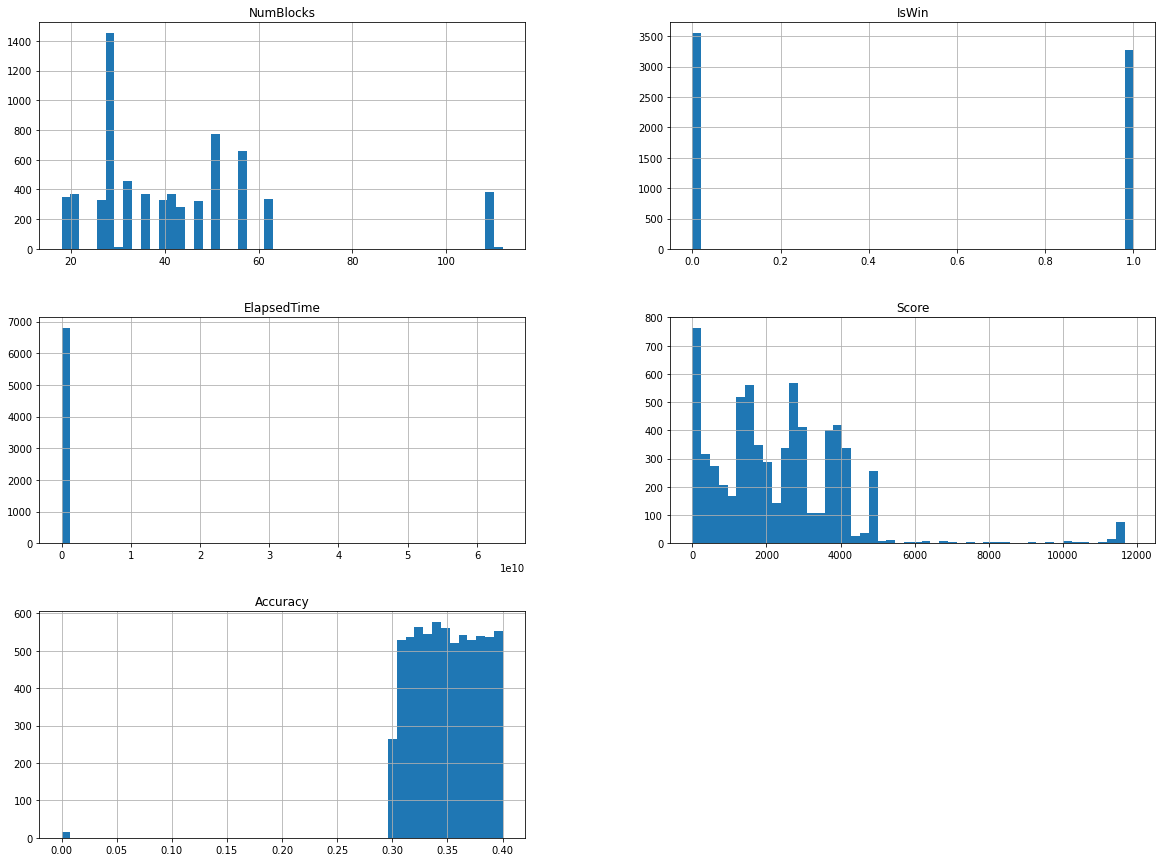

In [24]:
tetris.hist(bins = 50,figsize=(20,15))
plt.savefig('./tetris_hist.png')
plt.show()

## Перевод в числовые значения
Неободимо перевести все категориальные столбцы к числовым, а именно 'Date' и 'Level'. Выполним преобразования и оценим новые значения.

In [28]:
tetris['Date'] = tetris['Date'].astype('category')
tetris['Level'] = tetris['Level'].astype('category')
cat_columns = tetris.select_dtypes(['category']).columns
tetris[cat_columns] = tetris[cat_columns].apply(lambda x: x.cat.codes)
tetris.describe(include="all")

,Date,Level,NumBlocks,IsWin,ElapsedTime,Score,Accuracy
count,6814.000000,6814.000000,6814.000000,6814.000000,6.814000e+03,6814.000000,6814.000000
mean,3386.777957,8.748312,42.411212,0.479307,4.674458e+07,2381.398591,0.349156
std,1953.315257,5.350580,20.800499,0.499608,1.725121e+09,1918.640734,0.033333
min,0.000000,0.000000,18.000000,0.000000,2.630203e-01,0.000000,0.000000
25%,1695.250000,4.000000,28.000000,0.000000,8.032081e+00,1150.000000,0.325245
50%,3389.500000,9.000000,39.000000,0.000000,1.861382e+01,2100.000000,0.349451
75%,5075.750000,13.000000,50.000000,1.000000,2.908311e+01,3550.000000,0.374960
max,6769.000000,18.000000,112.000000,1.000000,6.370349e+10,11900.000000,0.399999


## Визуализация и анализ данных
Построим графики зависимостей основных численных значений: уровень, счет и число блоков.

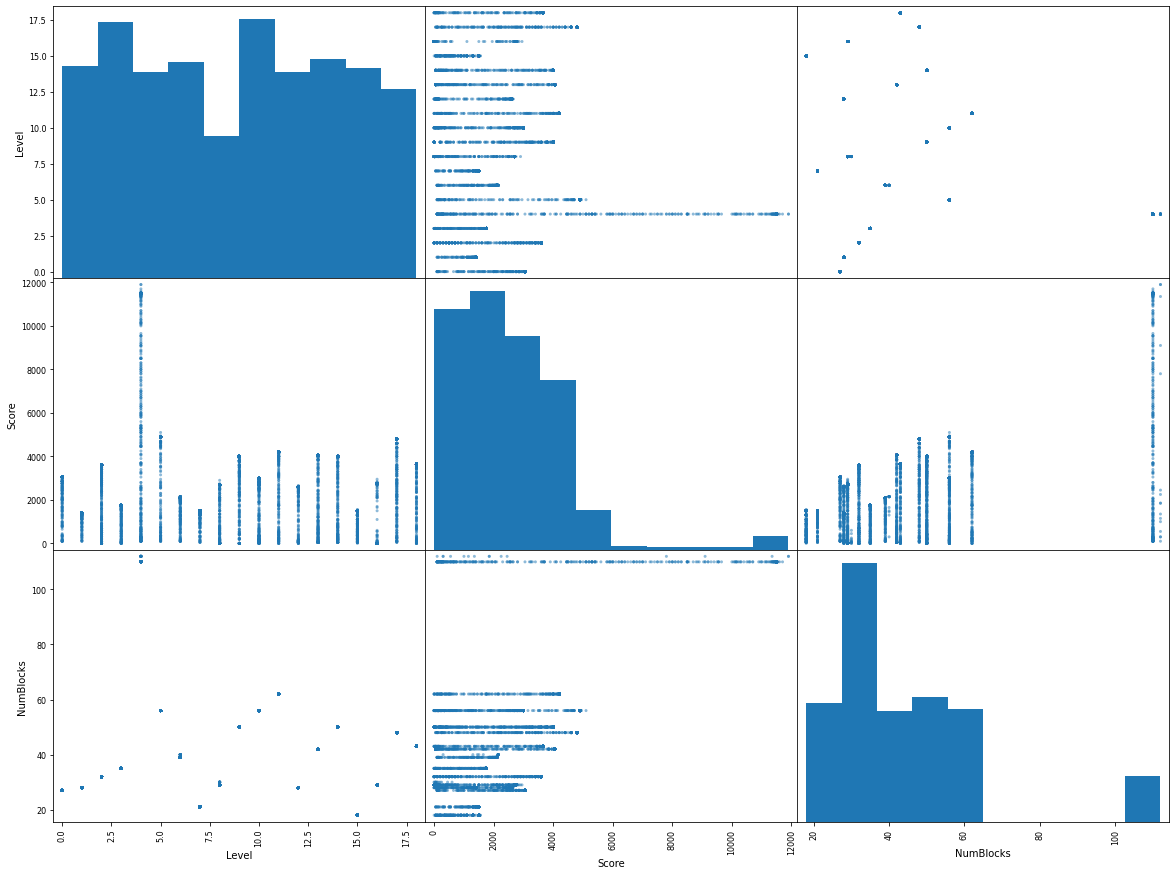

In [30]:
from pandas.plotting import scatter_matrix
attributes = ["Level", "Score","NumBlocks"]

scatter_matrix(tetris[attributes], figsize=(20, 15))
plt.savefig('./Tetris_records.png')

## Корреляция признаков

In [32]:
corr_matrix = tetris.corr()
corr_matrix["IsWin"].sort_values(ascending=False)

IsWin          1.000000
Score          0.362824
Accuracy       0.326482
ElapsedTime    0.006547
Date          -0.012333
Level         -0.076980
NumBlocks     -0.172469
Name: IsWin, dtype: float64

In [31]:
corr_matrix = tetris.corr()
corr_matrix["Score"].sort_values(ascending=False)

Score          1.000000
NumBlocks      0.516357
IsWin          0.362824
Accuracy       0.246495
ElapsedTime    0.008031
Date          -0.012595
Level         -0.048138
Name: Score, dtype: float64

Как и предполагалась,что основным параметром для набора очков служит число убранных блоков, а из этого будет вытекать все остальное. Также можно оценить значимость каждого фактора на победу игрока (даже число игры имеет важность :) ).

## Вывод
Подводя общий итог второй части лабораторной работы и всей в целом, хочется отметить, что pandas является очень сильным инструментом для анализа данных. Прежде всего это достигается вариативностью решений проблемы и относительной простотой написания (для полного использования необходимо знать все возможности). Я считаю, что даже ознакомление с этой средой является отличным опытом, который может пригодиться в будущем.